In [259]:
%matplotlib inline
import requests
from bs4 import BeautifulSoup
import os
import pandas as pd
import time
import re
import seaborn
from lxml import html
import matplotlib

%config InlineBackend.figure_format = 'svg'
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

Получаем 250 самых топовых фильмов

In [260]:
url = 'http://www.imdb.com/chart/top'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')

Парсим страницу с фильмами и получаем грязные данные с


1.   Названием фильма
2.   Рейтингом
3.   Командой 
4.   Ссылкой на основную страницу




In [261]:
movies = soup.select('td.titleColumn')
links = [a.attrs.get('href') for a in soup.select('td.titleColumn a')]
crew = [a.attrs.get('title') for a in soup.select('td.titleColumn a')]
ratings = [b.attrs.get('data-value') for b in soup.select('td.posterColumn span[name=ir]')]

In [262]:
data_frame = {
    "movies": movies,
    "ratings": ratings,
    "crew": crew,
    "links": links
}

data = pd.DataFrame(data_frame)
data

,movies,ratings,crew,links
0,"[\n 1.\n , [Побег из Шоушенка], \n, ...",9.235329912966465,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/
1,"[\n 2.\n , [Крёстный отец], \n, [(19...",9.156071258180997,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/
2,"[\n 3.\n , [Темный рыцарь], \n, [(20...",8.989807154223588,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/
3,"[\n 4.\n , [Крёстный отец 2], \n, [(...",8.984105882147366,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/
4,"[\n 5.\n , [12 рaзгневанных мужчин],...",8.951320723832364,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/
...,...,...,...,...
245,"[\n 246.\n , [Стальной гигант], \n, ...",8.005526006226994,"Brad Bird (dir.), Eli Marienthal, Harry Connic...",/title/tt0129167/
246,"[\n 247.\n , [Аладдин], \n, [(1992)]...",8.00501022565818,"Ron Clements (dir.), Scott Weinger, Robin Will...",/title/tt0103639/
247,"[\n 248.\n , [Прислуга], \n, [(2011)...",8.004887225330698,"Tate Taylor (dir.), Viola Davis, Emma Stone",/title/tt1454029/
248,"[\n 249.\n , [Ганди], \n, [(1982)], \n]",8.003960538054871,"Richard Attenborough (dir.), Ben Kingsley, Joh...",/title/tt0083987/


Несколько функциий для преобзразования грязных заголовков с названием фильмов


In [263]:
def process_text_mv(text):
    data = text.get_text().split("\n")
    return data[2].strip()

In [264]:
def process_text_year(text):
    data = text.get_text().split("\n")
    return data[3].strip()[1:-1]

In [265]:
data["title"] = data.movies.apply(process_text_mv)
data["year"] = data.movies.apply(process_text_year)

In [266]:
data.head()

,movies,ratings,crew,links,title,year
0,"[\n 1.\n , [Побег из Шоушенка], \n, ...",9.235329912966465,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/,Побег из Шоушенка,1994
1,"[\n 2.\n , [Крёстный отец], \n, [(19...",9.156071258180997,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/,Крёстный отец,1972
2,"[\n 3.\n , [Темный рыцарь], \n, [(20...",8.989807154223588,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/,Темный рыцарь,2008
3,"[\n 4.\n , [Крёстный отец 2], \n, [(...",8.984105882147366,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/,Крёстный отец 2,1974
4,"[\n 5.\n , [12 рaзгневанных мужчин],...",8.951320723832364,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/,12 рaзгневанных мужчин,1957


In [267]:
data.crew[1]

'Francis Ford Coppola (dir.), Marlon Brando, Al Pacino'

Задача 1.
Получить список всех участников команд (убрать постфикс `(dir.)` у директоров). Найти количество уникальных имен. 

Задача 2.
Получить список всех директоров. Построить распределение (визуализация обязательна) и найти директора(ов), у которого(ых) больше всего фильмов в топе.

Задача 3. Найти участника(ов) команд, у которого(ых) больше всего фильмов в топе.

Задача 4. Построить распределение топовых фильмов по годам

Задача 5. Построить распределение топовых фильмов рейтингу:


*   Округлить до сотых и отрисовать
*   Округлить до десятых и отрисовать
*   Округлить до целых и отрисовать

Задача 6. Используйте ссылку `http://www.imdb.com/` и динамически добавляя ссылку на фильм из колонки `links` соберите описание фильмов. Пример поиска необходимого текст представлен ниже. Добавьте эту информацию в исходный датафрейм.










In [295]:
film_url = 'http://www.imdb.com/title/tt0068646/'
html_text = requests.get(film_url).text

In [296]:
soup = BeautifulSoup(html_text, 'lxml')
soup.find_all(attrs={"name": "description"})[0].get("content")

IndexError: list index out of range

In [ ]:
#Задача 1. Получить список всех участников команд 
crew = []
for value in data["crew"].tolist():
    crew.extend(value.split(","))
    
from collections import Counter

Counter(crew)


In [ ]:
#(убрать постфикс (dir.) у директоров)
crew1 = [x.replace('(dir.)', '') for x in crew]
print(crew1)

In [ ]:
#Найти количество уникальных имен. 

num_names = len(set(crew1))
print(num_names)



In [ ]:
#Задача 2. Получить список всех директоров (режиссеров)

directors = []

item = "(dir.)"
for person in crew:
    if item not in person:
        continue
    if item in person:
        directors.append(person)
print(directors)

In [ ]:
#(убрать постфикс (dir.) у режиссеров
directors = [x.replace('(dir.)', '') for x in directors]
print(directors)

In [ ]:
#найти директора(ов), у которого(ых) больше всего фильмов в топе.
import collections
counter = collections.Counter(directors)
print(counter.most_common())


In [ ]:
directors_most_films = counter.most_common()
directors_most_films

In [ ]:
#построить визуализацию на основе списка. (Странно выводятся имена режиссеров и количество фильмов)
import numpy as np
import matplotlib.pyplot as plt

labels, ys = zip(*directors_most_films[0:10])
xs = np.arange(len(labels))
width = 0.8

plt.bar(xs, ys, width, align = 'center')

plt.xticks(xs, labels, rotation='vertical')
plt.yticks(ys)

plt.show()

In [ ]:
#Задача 3. Найти участника(ов) команд, у которого(ых) больше всего фильмов в топе.
import collections
counter = collections.Counter(crew1)
print(counter.most_common())


In [ ]:
#Задача 4. Построить распределение топовых фильмов по годам
#Вывела соотношение годов и топовых фильмов, выпущенных в каждый год
from collections import Counter

counter = collections.Counter(data.year)
print(counter.most_common())

top_films_years = counter.most_common()
top_films_years

import numpy as np
import matplotlib.pyplot as plt

labels, ys = zip(*top_films_years[0:10])
xs = np.arange(len(labels))
width = 0.8

plt.bar(xs, ys, width, align = 'center')

plt.xticks(xs, labels, rotation='vertical')
plt.yticks(ys)

plt.show()

<AxesSubplot:title={'center':'Rating'}, ylabel='Frequency'>

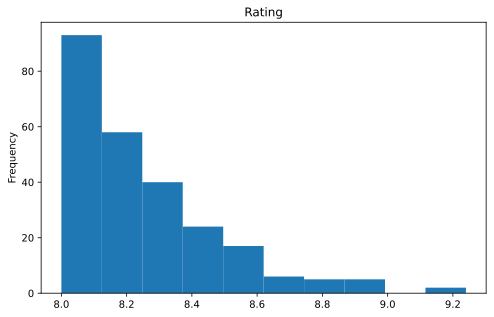

In [291]:
#Задача 5. Построить распределение топовых фильмов рейтингу:

#Округлить до сотых и отрисовать

data1 = data

data1.ratings = pd.to_numeric(data1.ratings, errors='coerce')
data1.ratings=data1['ratings'].round(decimals = 2)


data1['ratings'].plot(kind='hist', title='Rating')


<AxesSubplot:title={'center':'Rating'}, ylabel='Frequency'>

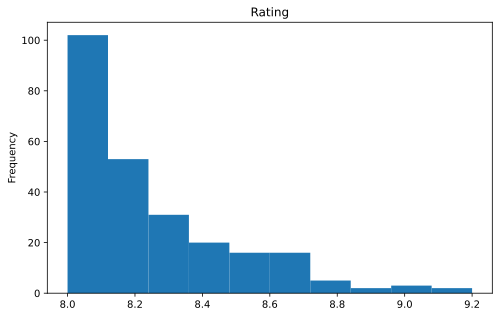

In [292]:
#Округлить до десятых и отрисовать
data2=data

data2.ratings = pd.to_numeric(data2.ratings, errors='coerce')
data2.ratings = data2['ratings'].round(decimals = 1)

data2['ratings'].plot(kind='hist', title='Rating')


<AxesSubplot:title={'center':'Rating'}, ylabel='Frequency'>

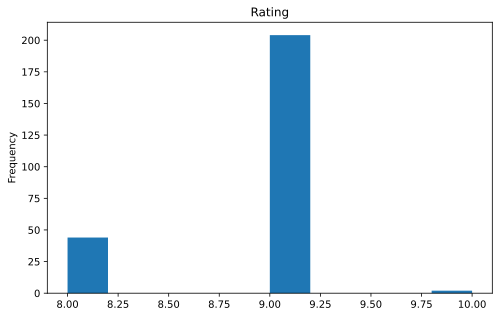

In [293]:
data3=data

data3.ratings = data3['ratings'].apply(np.ceil)

data3['ratings'].plot(kind='hist', title='Rating')

#округлить до целых и отрисовать

In [294]:

#Задача 6. Используйте ссылку http://www.imdb.com/ и динамически добавляя ссылку на фильм из колонки links 
    #соберите описание фильмов. Пример поиска необходимого текст представлен ниже. 
    #Добавьте эту информацию в исходный датафрейм.

film_url = 'http://www.imdb.com/title/tt0068646/'
html_text = requests.get(film_url).text


Задача 7. С помощью регулярных выражений найдите в текстах описания фильмов имена актеров, если это возможно (то есть - они там упоминаются). Добавьте эту информацию в датафрейм и посчитайте, для скольких фильмов получилось это сдлеать. Подсказка: перечисление актеров иногда начинается с with. 


Задача 8. Распарсите исходную страницу с топ-250 фильмов и получите для каждого фильмов количество оценок. Пример текста в исходной странице:`9.2 based on 2,554,919 user ratings`. Из этого текста нужно достать = `2,554,919`. Подсказка: используя метод `find_all` с аргументом `attrs` в который нужно передать `{'class': 'ratingColumn imdbRating'}` от страници `http://www.imdb.com/chart/top`. Найдите 10 фильмов (вывести их название и кол-во оценок) у которых, самое большое количество оценок.


Задача 9. Постройте топ 10 слов, которые встречаются 

1.   в названии фильмов
2.   в описании фильмов
3.   в названии и в описании фильмов


Задача 10*. Спарсить теги фильмов со страницы каждого фильма, так например для `The Godfather` ожидается получить список из `Crime, Drama`. (Можно увидеть эти теги по картинкой к фильму)
